Импортируем необходимые бибилиотеки

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


Импортируем датасет и смотрим на данные

In [275]:
df = pd.read_csv('data/fmnist_train.csv')
display(df)
df.info()
print(f'Пропусков: {df.isna().sum().sum()}')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,186.0,16.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17035
17036,4,0,0,0,0,0,0,5,4,3,...,0.0,33.0,48.0,37.0,3.0,0.0,0.0,0.0,0.0,17036
17037,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17037
17038,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17038


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 786 entries, label to Id
dtypes: float64(424), int64(362)
memory usage: 102.2 MB
Пропусков: 424


При первичном изучении датасета видим, что в тренировочном датасете есть пропуски, а также типы данных в колонках есть как float, так и int.

Избавимся от пропусков, от ненужных колонок (id) а также приведем все ячейки датасета к одному типу данных.
Так как данные это значение шкалы сервого, можем заменить пропуски на 0 (белый цвет)

In [276]:
cleared_df = df.fillna(0).drop(columns=['Id'])
for col in cleared_df.columns:
    cleared_df[col] = cleared_df[col].astype(int)

display(cleared_df)
cleared_df.info()
print(f'Пропусков после очистки: {cleared_df.isna().sum().sum()}')

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17035,4,0,0,0,0,0,0,0,1,0,...,195,186,16,0,2,0,0,0,0,0
17036,4,0,0,0,0,0,0,5,4,3,...,0,0,33,48,37,3,0,0,0,0
17037,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17038,6,0,0,0,0,0,0,0,0,0,...,40,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 102.1 MB
Пропусков после очистки: 0


Посмотрим распределение классов в треноровочном датасете

label
0    1770
1    1700
2    1677
3    1725
4    1639
5    1695
6    1704
7    1761
8    1675
9    1694
Name: count, dtype: int64

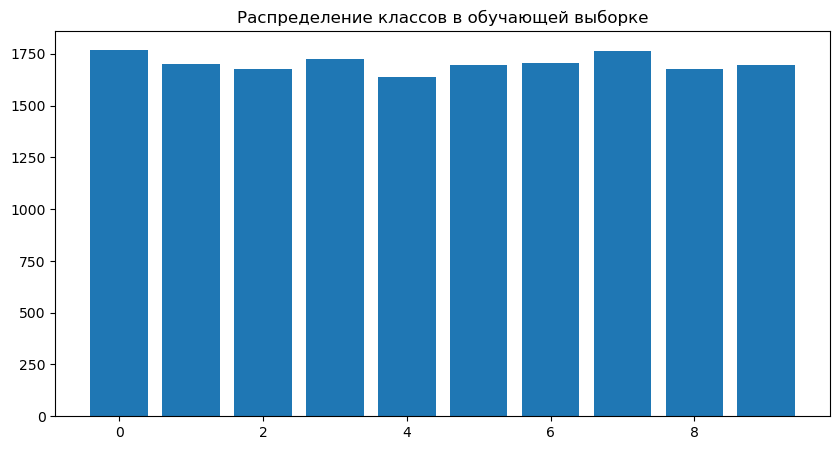

In [277]:
class_counts = cleared_df['label'].value_counts().sort_index()
display(class_counts)

plt.figure(figsize=(10, 5))
plt.bar(list(range(10)), class_counts)
plt.title('Распределение классов в обучающей выборке')
plt.show()

Видим что классы в целом сбалансированы

Проверим, что каждая ячейка содержит значение пикселей от 0 до 255

In [278]:
pixels = cleared_df.drop(columns=['label'])
print(f"Минимальное занчение пикселя в датасете: {pixels.min().min()}")
print(f"Максимальное занчение пикселя в датасете: {pixels.max().max()}")

Минимальное занчение пикселя в датасете: 0
Максимальное занчение пикселя в датасете: 255


Также проверим распределение интенсивностей пикселей — есть ли какая-то концентрация на темных или светлых значениях.

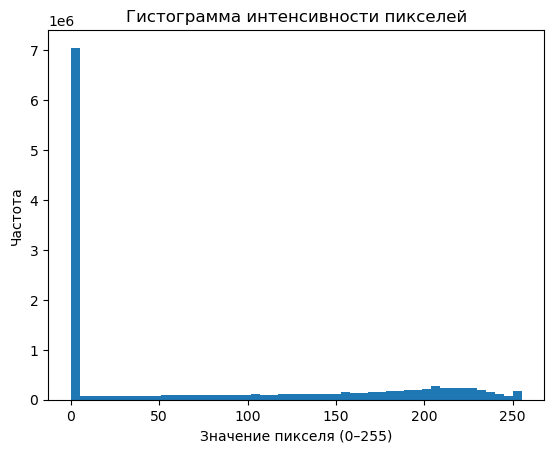

In [279]:
all_pixels = pixels.values.flatten()
plt.figure()
plt.hist(all_pixels, bins=50)
plt.xlabel('Значение пикселя (0–255)')
plt.ylabel('Частота')
plt.title('Гистограмма интенсивности пикселей')
plt.show()

Видим, что много пикселей сосредоточено в 0, но вероятнее всего это фон, что не помещает обучению


Попробуем убедиться что в тренировчном датасете действительно занчения градиента сервого различных предметов одежды.

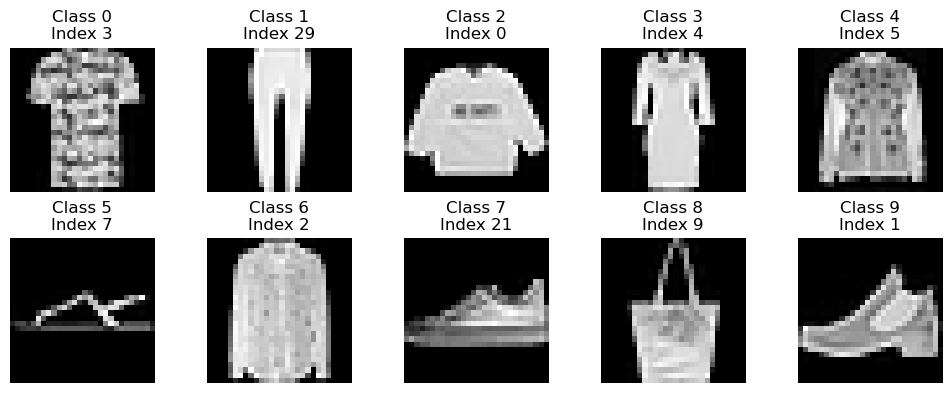

In [280]:
classes = sorted(cleared_df['label'].unique())
first_indices = {
    cls: cleared_df[cleared_df['label'] == cls].index[0]
    for cls in classes
}
n = len(classes)
cols = 5             
rows = (n + cols - 1) // cols 
fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
axes = axes.flatten() 
for ax, cls in zip(axes, classes):
    idx = first_indices[cls]
    pixels = cleared_df.loc[idx, cleared_df.columns != 'label'].values
    img = pixels.reshape(28, 28)
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Class {cls}\nIndex {idx}')
    ax.axis('off')


plt.tight_layout()
plt.show()


Далее переведем пиксели в диапозон от 0 до 1, чтобы улучшить сходимость модели и ускорит обучение.

In [281]:
df_norm = cleared_df.copy()
pixel_cols = [c for c in df_norm.columns if c.startswith('pixel')]

df_norm[pixel_cols] = df_norm[pixel_cols].astype('float32') / 255.0
print("Мин по всем пикселям:", df_norm[pixel_cols].min().min())
print("Макс по всем пикселям:", df_norm[pixel_cols].max().max())

Мин по всем пикселям: 0.0
Макс по всем пикселям: 1.0


Переходим к обучению модели.

Подготовим данные на вход модели

In [282]:
X = df_norm[pixel_cols].values
y = to_categorical(df_norm['label'].values, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Для начала попробуем обучить обычный многослойный перцепторн 

Epoch 1/100


/home/vladimir/PycharmProjects/MIFI_tasks/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6191 - loss: 1.0592 - val_accuracy: 0.8350 - val_loss: 0.4853
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.5250 - val_accuracy: 0.8482 - val_loss: 0.4104
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.4422 - val_accuracy: 0.8416 - val_loss: 0.3950
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3999 - val_accuracy: 0.8651 - val_loss: 0.3736
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3742 - val_accuracy: 0.8629 - val_loss: 0.3744
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3621 - val_accuracy: 0.8783 - val_loss: 0.3538
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3503 - val_accuracy: 0.8651 - val_loss: 0.3681
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.3187 - val_accuracy: 0.8592 - val_loss: 0.

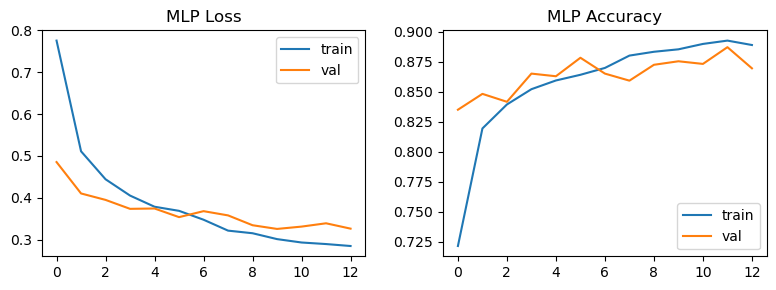

In [283]:
mlp = keras.models.Sequential([
    Dense(512, activation='relu', input_shape=(len(pixel_cols),)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
mlp.compile(optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

es = EarlyStopping(patience=3, restore_best_weights=True)
history_mlp = mlp.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=128,
    callbacks=[es]
)

# 1.3 Оцениваем на тесте
test_loss, test_acc = mlp.evaluate(X_test, y_test, verbose=0)
print(f"MLP test accuracy: {test_acc:.4f}")

# 1.4 Графики обучения
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.title('MLP Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.title('MLP Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Видим неплохой результат на 9 эпохе в точности 0.87

Попробуем обучить сверточную нейронную сеть

Epoch 1/100


/home/vladimir/PycharmProjects/MIFI_tasks/.conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5688 - loss: 1.2122 - val_accuracy: 0.8109 - val_loss: 0.5152
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.5461 - val_accuracy: 0.8387 - val_loss: 0.4235
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8265 - loss: 0.4655 - val_accuracy: 0.8497 - val_loss: 0.3838
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8353 - loss: 0.4425 - val_accuracy: 0.8497 - val_loss: 0.3583
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3695 - val_accuracy: 0.8578 - val_loss: 0.3520
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8692 - loss: 0.3486 - val_accuracy: 0.8739 - val_loss: 0.3209
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8699 - loss: 0.3435 - val_accuracy: 0.8842 - val_loss: 0.3019
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.3096 - val_accuracy: 0.8739

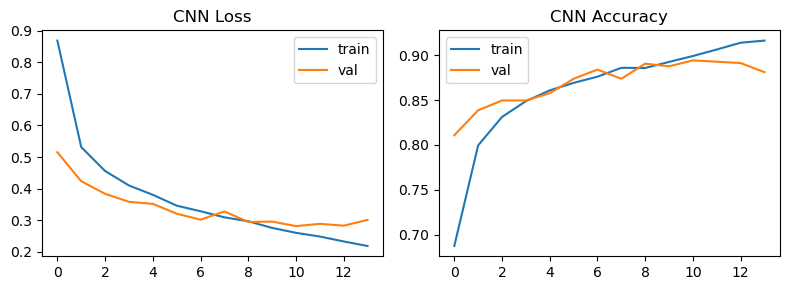

In [284]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn  = X_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
es2 = EarlyStopping(patience=3, restore_best_weights=True)
history_cnn = cnn.fit(X_train_cnn, y_train,
                      validation_split=0.1,
                      epochs=100, batch_size=64,
                      callbacks=[es2])

test_loss2, test_acc2 = cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN test accuracy: {test_acc2:.4f}")

# 2.5 Графики обучения
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'], label='train')
plt.plot(history_cnn.history['val_loss'], label='val')
plt.title('CNN Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='train')
plt.plot(history_cnn.history['val_accuracy'], label='val')
plt.title('CNN Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Видим, что сверточная нейронная сеть показала себя лучше на валидационных данных, хотя и не намного. Логичнее будем использовать ее.

Загрузим проверочный датасет, проведем с ним те же самые манипуляции что и с тренировочным датасетом и сделаем предсказания.

In [285]:
test_df = pd.read_csv('data/fmnist_test.csv')

pixel_cols = [c for c in test_df.columns if c.startswith('pixel')]
X_test_real = test_df[pixel_cols].astype('float32') / 255.0
X_test_cnn = X_test_real.values.reshape(-1,28,28,1)
y_proba = cnn.predict(X_test_cnn, batch_size=64, verbose=1)
y_pred = y_proba.argmax(axis=1)
submission = pd.DataFrame({
    'Id':    test_df['Id'],  
    'label': y_pred
})
submission.to_csv('predictions.csv', index=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Результат на kaggle

![](image.png)